<a href="https://colab.research.google.com/github/longbui23/Amazon-Sentiment-Analysis/blob/main/Amazon_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AMAZON SENTIMENT ANALYSIS ON PHONE PAYMENTS**

  <a id="top"></a>
    <div class="list-group" id="list-tab" role="tablist">
    <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>
        
* [1. Dataset and Libraries](#1)
  - [a. Import Libraries and Dataset](#1a)
  - [b. Data Inspection](#1b)
* [2. Data Cleaning](#2)
* [3. Visualizations](#3)

<a id="1"></a>
<font color="blue" size=+2.5><b>1. Datasets and Libraries</b></font>

<a id="1a"></a>
<font color="black" size=+1.5><b>a. Import Dataset and Library</b></font>

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis

Mounted at /content/drive
/content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis


In [ ]:
#import packages
#data cleaning
import numpy as np
import pandas as pd
import statsmodels

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data
df = pd.read_csv("Data/Amazon_Unlocked_Mobile.csv")
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


<a id="1b"></a>
<font color="black" size=+1.5><b>b. Data Inspection </b></font>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [ ]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

We could obeserve that the dataset includes numerous missing values in Brand Name, Price, Reviews, and Review Votes columns which we would later inspect and attempt to replace these empty with reasonable assessment.

In [ ]:
df.describe()

,Price,Rating,Review Votes
count,407907.000000,413840.000000,401544.000000
mean,226.867155,3.819578,1.507237
std,273.006259,1.548216,9.163853
min,1.730000,1.000000,0.000000
25%,79.990000,3.000000,0.000000
50%,144.710000,5.000000,0.000000
75%,269.990000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


<ipython-input-7-ee08e4814098>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], ax=axes[0])


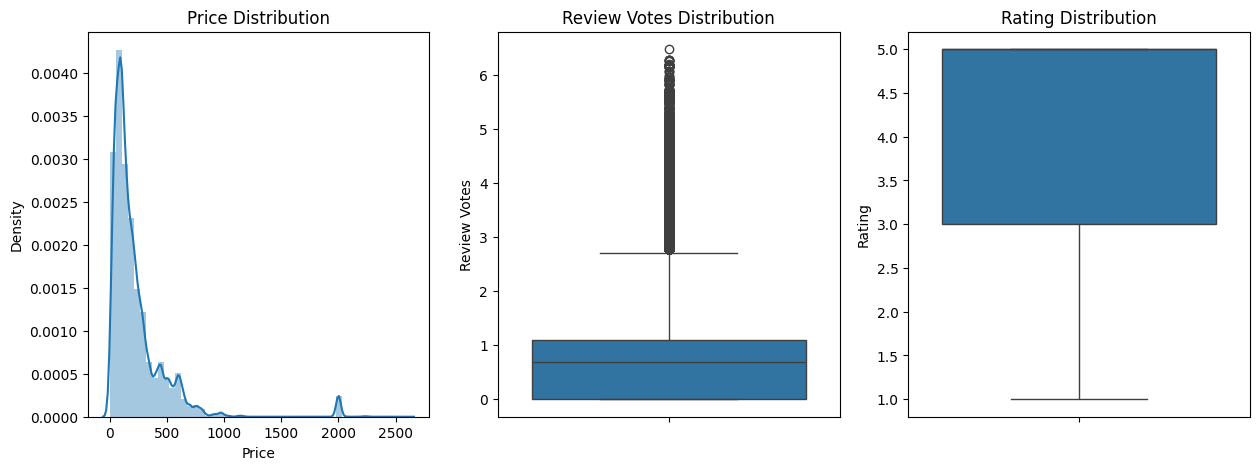

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df['Price'], ax=axes[0])
axes[0].set_title('Price Distribution')

sns.boxplot(np.log(df[df['Review Votes'] > 0]['Review Votes']), ax=axes[1])
axes[1].set_title('Review Votes Distribution')

sns.boxplot(df['Rating'], ax=axes[2])
axes[2].set_title('Rating Distribution')

plt.show()

According to the graph above, price of phones consists a dominant range from $100 to $700 and there are a groups of phone price around $2000.

Most comments have an average of 0 to 300 review votes while some are distinguishingly high.

Most of the ratings are from 3 to 5, indicating that products in the dataset has high level of satisfaction from buyers.

## Price

In [ ]:
top_product = df[df['Price']>=2000].sort_values(by='Price', ascending=False)
top_product['Edition'] = top_product['Product Name'].str.split().str[-1]
top_product

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Edition
165302,BlueCosmo Iridium Extreme Satellite Phone Kit ...,Iridium,2598.0,5,"These folks are good! Knowledgeable, helpful, ...",0.0,SIM
209686,Lenovo VIBE X2 3G Unlocked Smartphone 5.0 inch...,Lenovo,2566.0,1,Bought two of these as Christmas gifts. One of...,0.0,(Gold)
209687,Lenovo VIBE X2 3G Unlocked Smartphone 5.0 inch...,Lenovo,2566.0,2,I loved the phone and the style however it wou...,1.0,(Gold)
209689,Lenovo VIBE X2 3G Unlocked Smartphone 5.0 inch...,Lenovo,2566.0,5,Thank you!,0.0,(Gold)
209688,Lenovo VIBE X2 3G Unlocked Smartphone 5.0 inch...,Lenovo,2566.0,4,"the phone is cover my expectatives, the qualit...",1.0,(Gold)
...,...,...,...,...,...,...,...
136243,BLU Studio 5.0 C HD Smartphone - Unlocked - Ye...,BLU,2000.0,4,Good for $100 but has no gyro for VR/Google Ca...,0.0,Yellow
136242,BLU Studio 5.0 C HD Smartphone - Unlocked - Ye...,BLU,2000.0,4,Cant ask for more for the price.,0.0,Yellow
136241,BLU Studio 5.0 C HD Smartphone - Unlocked - Ye...,BLU,2000.0,5,My son has been very pleased with his 'new' ce...,0.0,Yellow
136240,BLU Studio 5.0 C HD Smartphone - Unlocked - Ye...,BLU,2000.0,5,Phone is great. Seller said it would work with...,0.0,Yellow


<u>Most expensive:</u> Sattelite phone --> enable to call, message, and data service everywhere on Earth + Rating maximum --> That's why it is so expensive.

<u>Other expensive phones</u>: Limited Edition, Gold Edition


In [ ]:
affd_prod = df[df['Price']==df['Price'].min()]
affd_prod['Edition'] = affd_prod['Product Name'].str.split().str[-1]
affd_prod

<ipython-input-9-362f47619593>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  affd_prod['Edition'] = affd_prod['Product Name'].str.split().str[-1]


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Edition
205718,Iphone 5 & 5S Replacement Belt Clip for OtterB...,OtterBox,1.73,3,"Got this for some one else,",0.0,Cases
205719,Iphone 5 & 5S Replacement Belt Clip for OtterB...,OtterBox,1.73,1,Its cheap,0.0,Cases
205720,Iphone 5 & 5S Replacement Belt Clip for OtterB...,OtterBox,1.73,5,"good product, took an extra long time to get b...",0.0,Cases
205721,Iphone 5 & 5S Replacement Belt Clip for OtterB...,OtterBox,1.73,5,Works like the original,0.0,Cases
205722,Iphone 5 & 5S Replacement Belt Clip for OtterB...,OtterBox,1.73,3,It's ok but not same quality as Otto. The clip...,0.0,Cases
...,...,...,...,...,...,...,...
206163,Iphone 5 & 5S Replacement Belt Clip for OtterB...,OtterBox,1.73,5,Awesome cheap replacement for otterbox clip th...,0.0,Cases
206164,Iphone 5 & 5S Replacement Belt Clip for OtterB...,OtterBox,1.73,5,Nice product. It came on time. Thanks.,0.0,Cases
206165,Iphone 5 & 5S Replacement Belt Clip for OtterB...,OtterBox,1.73,1,Did not hold my phone...not a good product!!,0.0,Cases
206166,Iphone 5 & 5S Replacement Belt Clip for OtterB...,OtterBox,1.73,3,Worked ok could have been a little tighter,0.0,Cases


In [ ]:
affd_prod = df[df['Price']<=5].sort_values(by='Price', ascending=False)
affd_prod['Edition'] = affd_prod['Product Name'].str.split().str[-1]
affd_prod['Edition'].value_counts()

Cases      450
Unused     198
SIM         44
Black       14
Service      5
Fast         1
Name: Edition, dtype: int64

Should drop all values that has cases, Sims, or Services

<ipython-input-11-c1a82a4801f0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

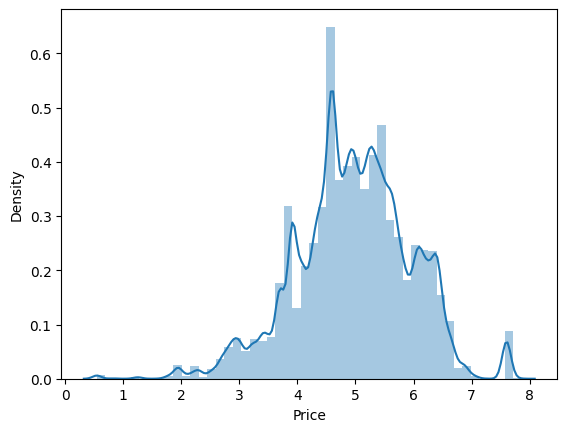

In [ ]:
sns.distplot(np.log(df['Price']))

Skew to the right --> log --> central skew (normal distribution) --> easier to run regression or comparision

## Review Votes

In [ ]:
print(df['Review Votes'].max())
df[df['Review Votes'] == df['Review Votes'].max()]['Reviews'].value_counts()

645.0


Hello !!I am writing this review so maybe I can help someone not waste 600 bucks on this deal.Bought this phone 2 months ago and shipped it inside the US.You might initially think this phone is sold by Samsung as Amazon states on the seller name. Well, it is not. It is really sold by a company called Worldwide Distributors.The model that this company shipped me is originally built to be used in Africa so the charging cube isnt useful with US power outlets; had to buy an original in the US to get started with it.This model will work almost with any US operator or at least mine worked with AT&T, Verizon, Telcel (Mexico), Claro (Argentina, Colombia).The issue I am having with this phone is that after 3 weeks of normal use, the display stopped working, the screen will go blank and it will remain unusable for maybe an hour. After this time period the display will come up but all tinted pink, that lasted for an hour and then the display will go blank again. This cycle repeated every day so y

Looks like the review that has the highest review votes is a complaint vote.

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
<ipython-input-38-7b2f1e2a7774>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axes[1] = sns.distplot((df['Review Length']**10))


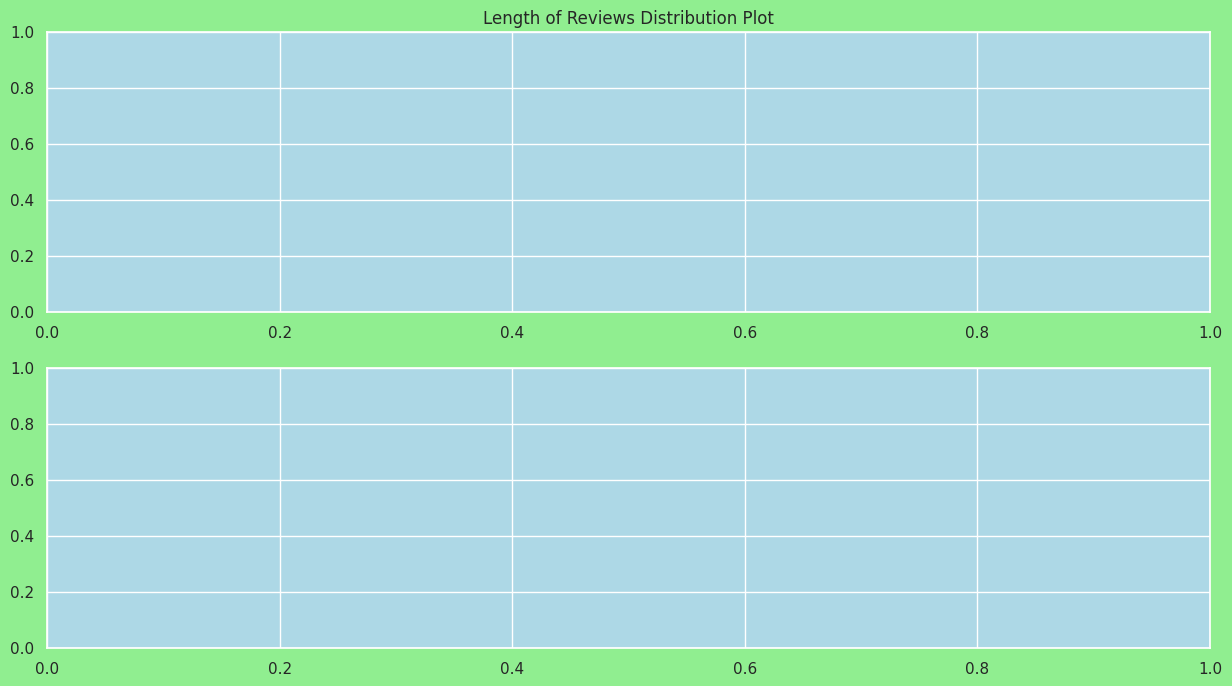

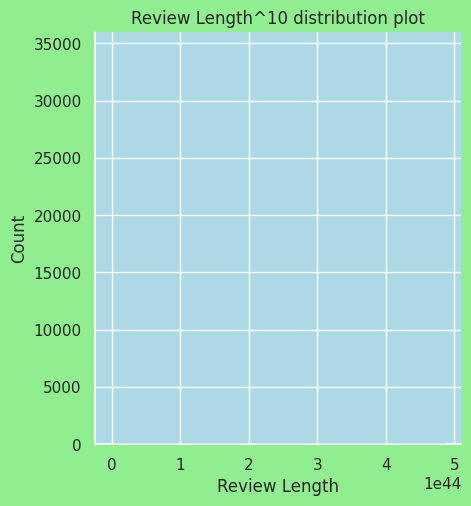

In [ ]:
#Plot style
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

#review length distribution
sns.displot(df['Review Length'], ax=axes[0])
axes[0].set_title('Length of Reviews Distribution Plot')

#review length ** 10 distribution --> normalizing data
axes[1] = sns.distplot((df['Review Length']**10))
axes[1].set_title('Review Length^10 distribution plot')

#display
plt.show()

## Rating

<ipython-input-16-9af915f80fa9>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axes[1] = sns.barplot(
<ipython-input-16-9af915f80fa9>:22: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  axes[1] = sns.barplot(


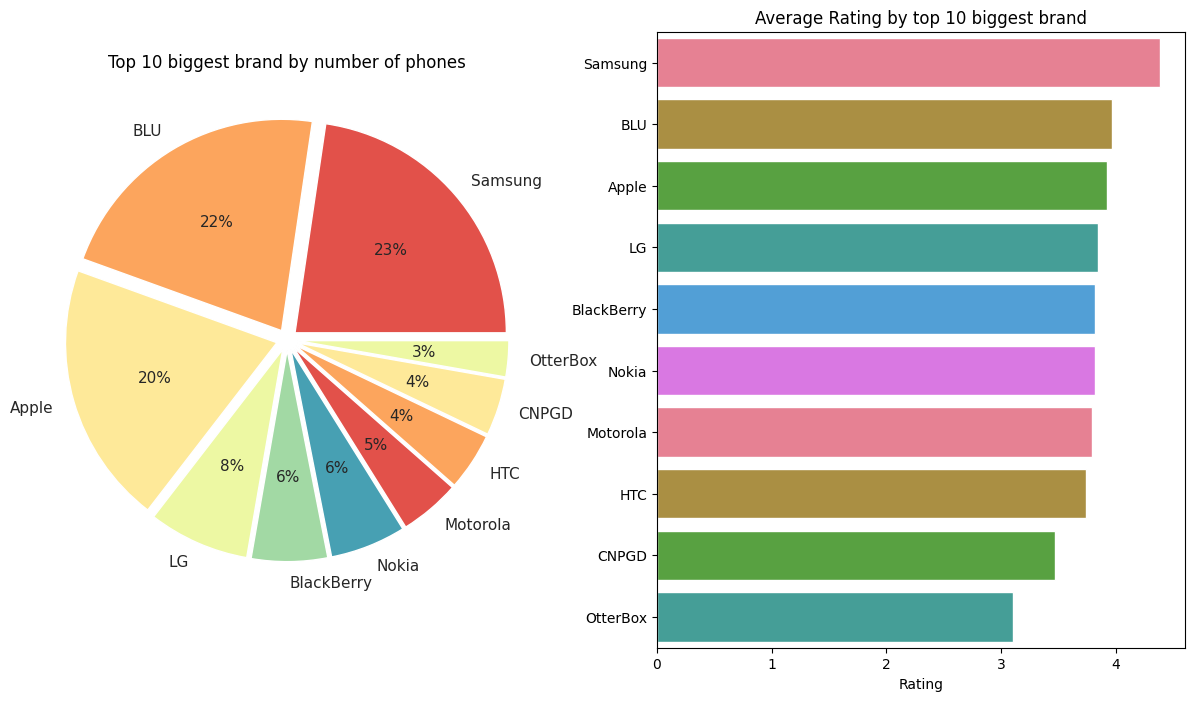

In [ ]:
#Plot style
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgreen'})

# Brand distribution
brand_df = df.groupby("Brand Name").agg({'Brand Name':'count','Rating':'mean'}).rename(
    columns={"Brand Name": "Count"}).sort_values(by='Count',ascending=False).head(10)

#pie-plot for number of phones ordered by brand
axes[0].pie(
    data=brand_df,
    x = 'Count',
    labels=brand_df.index,
    autopct = '%1.0f%%',
    textprops = {'fontsize':11},
    colors= sns.color_palette("Spectral"),
    explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,]
)
axes[0].set_title('Top 10 biggest brand by number of phones')

#bar-plot for top 10 biggest brand
axes[1] = sns.barplot(
    data=brand_df.sort_values('Rating', ascending=False),
    x='Rating',
    y=brand_df.index,

    palette = sns.color_palette("husl"),
)
axes[1].set_title('Average Rating by top 10 biggest brand')
axes[1].set(ylabel=None)


#display
plt.show()

   <a id="2"></a>
<font color="tblue" size=+2.5><b>2. Data Cleaning</b></font>

<a id="2a"></a>
<font color="black" size=+1.5><b>a. Replacing null values</b></font>

<a id="2ai"></a>
<font color="black" size=+1><b>i. Brand Names</b></font>

In [ ]:
df[df['Brand Name'].isnull()]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
110,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,NaN,269.10,2,when i got phone it wouldn't work I took it to...,0.0
111,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,NaN,269.10,4,I liked,0.0
112,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,NaN,269.10,5,Great. Arrived quickly.,0.0
113,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,NaN,269.10,4,"Phone works great, you may have to get a sum c...",0.0
114,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,NaN,269.10,5,Avianna LLC is an incredible seller. The phone...,0.0
...,...,...,...,...,...,...
413097,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,5,EXCELENTE,0.0
413098,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,2,Not as expected so I returned this phone,0.0
413099,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,5,very well,0.0
413100,ZTE V987 Android 4.1 MT6589 Quad Core 1.2GHz D...,NaN,167.22,5,excelente,0.0


In [ ]:
first_words = df['Product Name'].str.split().str[0]

In [ ]:
df['Brand Name'].fillna(first_words, inplace=True)

In [ ]:
brand_counts = df['Brand Name'].value_counts().sort_index()
print(brand_counts.head())

((Unlocked))BlackBerry      8
2.45                        2
4                         158
4G                          2
4G-Unlocked                 7
Name: Brand Name, dtype: int64


In [ ]:
df['Brand Name'] = df['Brand Name'].replace({'BLACK': 'BLACKBERRY', 'Black Berry':'BLACKBERRY', 'BlackBerry':'BLACKBERRY', 'BlackBerry Storm 9530 Smartphone Unlocked GSM Wireless Handheld Device w/Camera Bluetooth 3.25" Touchscreen LCD':'BLACKBERRY','Blackberrry':'BLACKBERRY','Blackberry': 'BLACKBERRY'})
df['Brand Name'] = df['Brand Name'].replace({'((Unlocked))BlackBerry': 'BLACKBERRY'})
df['Brand Name'] = df['Brand Name'].replace({'Boost Mobile': 'Boost'})
df['Brand Name'] = df['Brand Name'].replace({'ASUS Computers': 'ASUS'})
df['Brand Name'] = df['Brand Name'].replace({'Asus': 'ASUS'})
df['Brand Name'] = df['Brand Name'].replace({'ATT': 'AT&T'})
df['Brand Name'] = df['Brand Name'].replace({'Amazon.com, LLC *** KEEP PORules ACTIVE ***': 'Amazon'})
df['Brand Name'] = df['Brand Name'].replace({'Apple Computer': 'Apple'})
df['Brand Name'] = df['Brand Name'].replace({'CBSKY®': 'CBSKY'})

<a id="2aii"></a>
<font color="black" size=+1><b>ii. Reviews</b></font>

In [ ]:
#add Review Length
df['Review Length'] = df['Reviews'].str.len()

In [ ]:
df[df['Reviews'].isnull()]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length
6428,"Apple Iphone 4 - 8gb Sprint (CDMA) White, Smar...",Apple,NaN,4,NaN,2.0,NaN
12533,Apple iPhone 4S 16GB 3G WiFi White Smartphone ...,Apple,74.95,1,NaN,0.0,NaN
13024,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,4,NaN,3.0,NaN
13533,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,Apple,129.99,5,NaN,2.0,NaN
14651,Apple iPhone 4S 32GB Unlocked GSM Smartphone w...,Apple,NaN,4,NaN,3.0,NaN
...,...,...,...,...,...,...,...
368836,Samsung Galaxy S6 SM-G920i Factory Unlocked Ce...,samsung,429.99,4,NaN,48.0,NaN
369106,"Samsung Galaxy S6 SM-G920i Unlocked Cellphone,...",Samsung,479.99,4,NaN,48.0,NaN
369670,"Samsung Galaxy S6 SM-G920i Unlocked Cellphone,...",Samsung,479.99,4,NaN,48.0,NaN
379690,"Samsung N920 Unlocked Galaxy Note 5, GSM 32GB ...",Samsung,561.50,5,NaN,2.0,NaN


In [ ]:
df['Reviews'] = df['Reviews'].fillna("")
df['Review Length'] = df['Review Length'].fillna(0)

In [ ]:
df[df['Reviews'].isnull()]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length


## **Price**

In [ ]:
df[df['Price'].isnull()]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length
1544,90's Teenage Business Mobile Telephone Costume...,90's,NaN,5,"I didnt end up using it, but its cute and im s...",0.0,88.0
1545,90's Teenage Business Mobile Telephone Costume...,90's,NaN,5,"Fast, simple and easy.",0.0,22.0
1546,90's Teenage Business Mobile Telephone Costume...,90's,NaN,5,Hilarious. Worked great for Zack Morris Hallow...,0.0,57.0
1547,90's Teenage Business Mobile Telephone Costume...,90's,NaN,5,Perfect for a Zack Morris costume! Everyone lo...,1.0,53.0
1548,90's Teenage Business Mobile Telephone Costume...,90's,NaN,4,It was awesome and fun,0.0,22.0
...,...,...,...,...,...,...,...
404007,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,1,"Don't buy it....The phone is damaged, Imei Nul...",0.0,208.0
404008,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,1,Korean phone can change to English but still s...,0.0,160.0
404009,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,3,it doesn't came unlocked! I had to many proble...,0.0,63.0
404010,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,3,it's not working to Movistar venezuela,1.0,38.0


In [ ]:
df['Price'] = df['Price'].fillna("")

<a id="2a"></a>
<font color="black" size=+1.5><b>b. Removing outliers </b></font>

In [ ]:
df['Price'] = pd.to_numeric(df['Price'])

In [ ]:
#remove items with price = 1.73
df = df[df['Price'] > 1.73]

In [ ]:
df[df['Price'].notna() & (df['Price'] <= 79.99)].sort_values(by="Price")

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length
83248,AT&T Wireless 3G / 4G / LTE Micro SIM Card - P...,AT&T,2.29,5,"Bought from Tech Trend. Arrived on time, and i...",0.0,54.0
83236,AT&T Wireless 3G / 4G / LTE Micro SIM Card - P...,AT&T,2.29,5,great item thank you,0.0,20.0
83235,AT&T Wireless 3G / 4G / LTE Micro SIM Card - P...,AT&T,2.29,5,Arrived right on time and the SIM worked perfe...,0.0,74.0
83234,AT&T Wireless 3G / 4G / LTE Micro SIM Card - P...,AT&T,2.29,5,New item in original packaging. It's a SIM car...,0.0,61.0
83233,AT&T Wireless 3G / 4G / LTE Micro SIM Card - P...,AT&T,2.29,5,Good,0.0,4.0
...,...,...,...,...,...,...,...
177095,CNPGD MultiFunction All-in-1 Watch Cell Phone ...,CNPGD,79.99,3,It's okay. The app is crap. I can't figure out...,1.0,175.0
177094,CNPGD MultiFunction All-in-1 Watch Cell Phone ...,CNPGD,79.99,2,Nope.,0.0,5.0
177093,CNPGD MultiFunction All-in-1 Watch Cell Phone ...,CNPGD,79.99,1,I wanted a cheap fitness tracker with clock.Th...,1.0,653.0
177099,CNPGD MultiFunction All-in-1 Watch Cell Phone ...,CNPGD,79.99,2,It's used and there is some privete informatio...,0.0,78.0


In [ ]:
df = df[df['Product Name'] != 'AT&T Wireless 3G / 4G / LTE Micro SIM Card - Postpaid /Go Phone Prepaid - SKU 4681B Softcard SIM']


In [ ]:
df = df[df['Product Name']!='Unlock Alcatel Service']

In [ ]:
df = df[df['Price'] > 10.99]

In [ ]:
df.describe()

,Price,Rating,Review Votes,Review Length
count,403593.000000,403593.000000,391528.000000,403593.000000
mean,229.215833,3.824075,1.518022,217.402016
std,273.509481,1.546439,9.232737,465.473035
min,11.110000,1.000000,0.000000,0.000000
25%,79.990000,3.000000,0.000000,27.000000
50%,149.350000,5.000000,0.000000,94.000000
75%,274.860000,5.000000,1.000000,224.000000
max,2598.000000,5.000000,645.000000,29419.000000


   <a id="3"></a>
<font color="tblue" size=+2.5><b>3. Data Visualization</b></font>

In [ ]:
#em lam trong Tableau cho nhanh nha

   <a id="4"></a>
<font color="tblue" size=+2.5><b>4. Data Export</b></font>

In [ ]:
df.to_csv('df1.csv', index=False)